In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam



In [110]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

data_dir = pathlib.Path(data_dir)

In [111]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [114]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


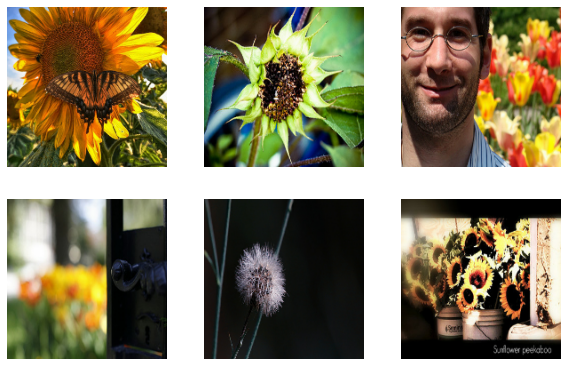

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(classname[labels[i]])
    plt.axis("off")

In [116]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [117]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [122]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [124]:
history = resnet_model.fit(train_ds,validation_data=val_ds, epochs=1)

ValueError: ignored

In [126]:
#ResNet101
resnet_model2 = Sequential()

pretrained_model2= tf.keras.applications.ResNet101(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model2.layers:
        layer.trainable=False

resnet_model2.add(pretrained_model)
resnet_model2.add(Flatten())
resnet_model2.add(Dense(512, activation='relu'))
resnet_model2.add(Dense(5, activation='softmax'))
resnet_model2.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history2 = resnet_model2.fit(train_ds,validation_data=val_ds, epochs=1)

In [ ]:
#DenseNet121
resnet_model3 = Sequential()

pretrained_model3= tf.keras.applications.DenseNet121(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model3.layers:
        layer.trainable=False

resnet_model3.add(pretrained_model)
resnet_model3.add(Flatten())
resnet_model3.add(Dense(512, activation='relu'))
resnet_model3.add(Dense(5, activation='softmax'))
resnet_model3.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history3 = resnet_model3.fit(train_ds,validation_data=val_ds, epochs=1)

In [ ]:
#MobileNetV2
resnet_model4 = Sequential()

pretrained_model4= tf.keras.applications.MobileNetV2(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model4.layers:
        layer.trainable=False

resnet_model4.add(pretrained_model)
resnet_model4.add(Flatten())
resnet_model4.add(Dense(512, activation='relu'))
resnet_model4.add(Dense(5, activation='softmax'))
resnet_model4.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history4 = resnet_model4.fit(train_ds,validation_data=val_ds, epochs=1)

In [ ]:
#inception_v3
resnet_model5 = Sequential()

pretrained_model5= tf.keras.applications.inception_v3(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model5.layers:
        layer.trainable=False

resnet_model5.add(pretrained_model)
resnet_model5.add(Flatten())
resnet_model5.add(Dense(512, activation='relu'))
resnet_model5.add(Dense(5, activation='softmax'))
resnet_model5.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history5 = resnet_model5.fit(train_ds,validation_data=val_ds, epochs=1)

In [ ]:
#VGG16
resnet_model6 = Sequential()

pretrained_model6= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model6.layers:
        layer.trainable=False

resnet_model6.add(pretrained_model)
resnet_model6.add(Flatten())
resnet_model6.add(Dense(512, activation='relu'))
resnet_model6.add(Dense(5, activation='softmax'))
resnet_model6.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history6 = resnet_model6.fit(train_ds,validation_data=val_ds, epochs=1)

In [ ]:
plt.figure(figsize=[20,5])
fig1 = plt.gcf()
plt.subplot(141);plt.(history.history['accuracy']);
plt.subplot(141);plt.(history.history['val_accuracy']);
plt.subplot(142);plt.(history.history2['accuracy']);
plt.subplot(142);plt.(history.history2['val_accuracy']);
plt.subplot(143);plt.(history.history3['accuracy']);
plt.subplot(143);plt.(history.history3['val_accuracy']);
plt.subplot(144);plt.(history.history4['accuracy']);
plt.subplot(144);plt.(history.history4['val_accuracy']);
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(dilate_img);plt.title("dilate image");

plt.subplot(142);plt.imshow(erode_img);plt.title("erode image");            

plt.subplot(143);plt.imshow(opening);plt.title("opening image");          

plt.subplot(144);plt.imshow(closing);plt.title("close image");

